In [2]:
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import pandas as pd
import numpy as np
import random

In [3]:
df_tr = pd.read_csv("ML_FP_train_updated_v3.csv")
df_t = pd.read_csv("ML_FP_test_updated_v3_com.csv")

# df_tr.shape (17170, 29)
#  df_t.shape (6315, 14)
print(df_tr.columns)
count_tr = df_tr.isna().any(axis=1).sum()
count_t = df_t.isna().any(axis=1).sum()
print("Number of rows with at least one NaN value in train data:", count_tr)
print("Number of rows with at least one NaN value in test data:", count_t)

Index(['Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo',
       'Duration_ms', 'Views', 'Likes', 'Stream', 'Composer'],
      dtype='object')
Number of rows with at least one NaN value in train data: 12045
Number of rows with at least one NaN value in test data: 6087


In [4]:
df_tr1 = df_tr[['Composer', 'Danceability']]
df_tr1 = df_tr1.groupby('Composer', as_index=False).mean().sort_values('Danceability', ascending=False)
df_tr1

,Composer,Danceability
0,0,6.878049
1,1,6.617284
2,2,5.904574
3,3,5.278794
4,4,5.149176
5,5,4.813953
6,6,4.519156
7,7,4.296985
8,8,3.834578
9,9,3.358209


In [5]:
num_artists_tr = df_tr['Composer'].nunique()
print("Number of different artists in df_tr:", num_artists_tr)
num_artists_t = df_t['Composer'].nunique()
print("Number of different artists in df_t:", num_artists_t)

Number of different artists in df_tr: 11
Number of different artists in df_t: 11


Text(0, 0.5, 'Danceability')

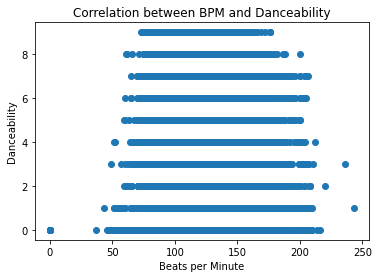

In [6]:
plt.scatter(df_tr['Tempo'], df_tr['Danceability'])
plt.title("Correlation between BPM and Danceability")
plt.xlabel("Beats per Minute")
plt.ylabel("Danceability")

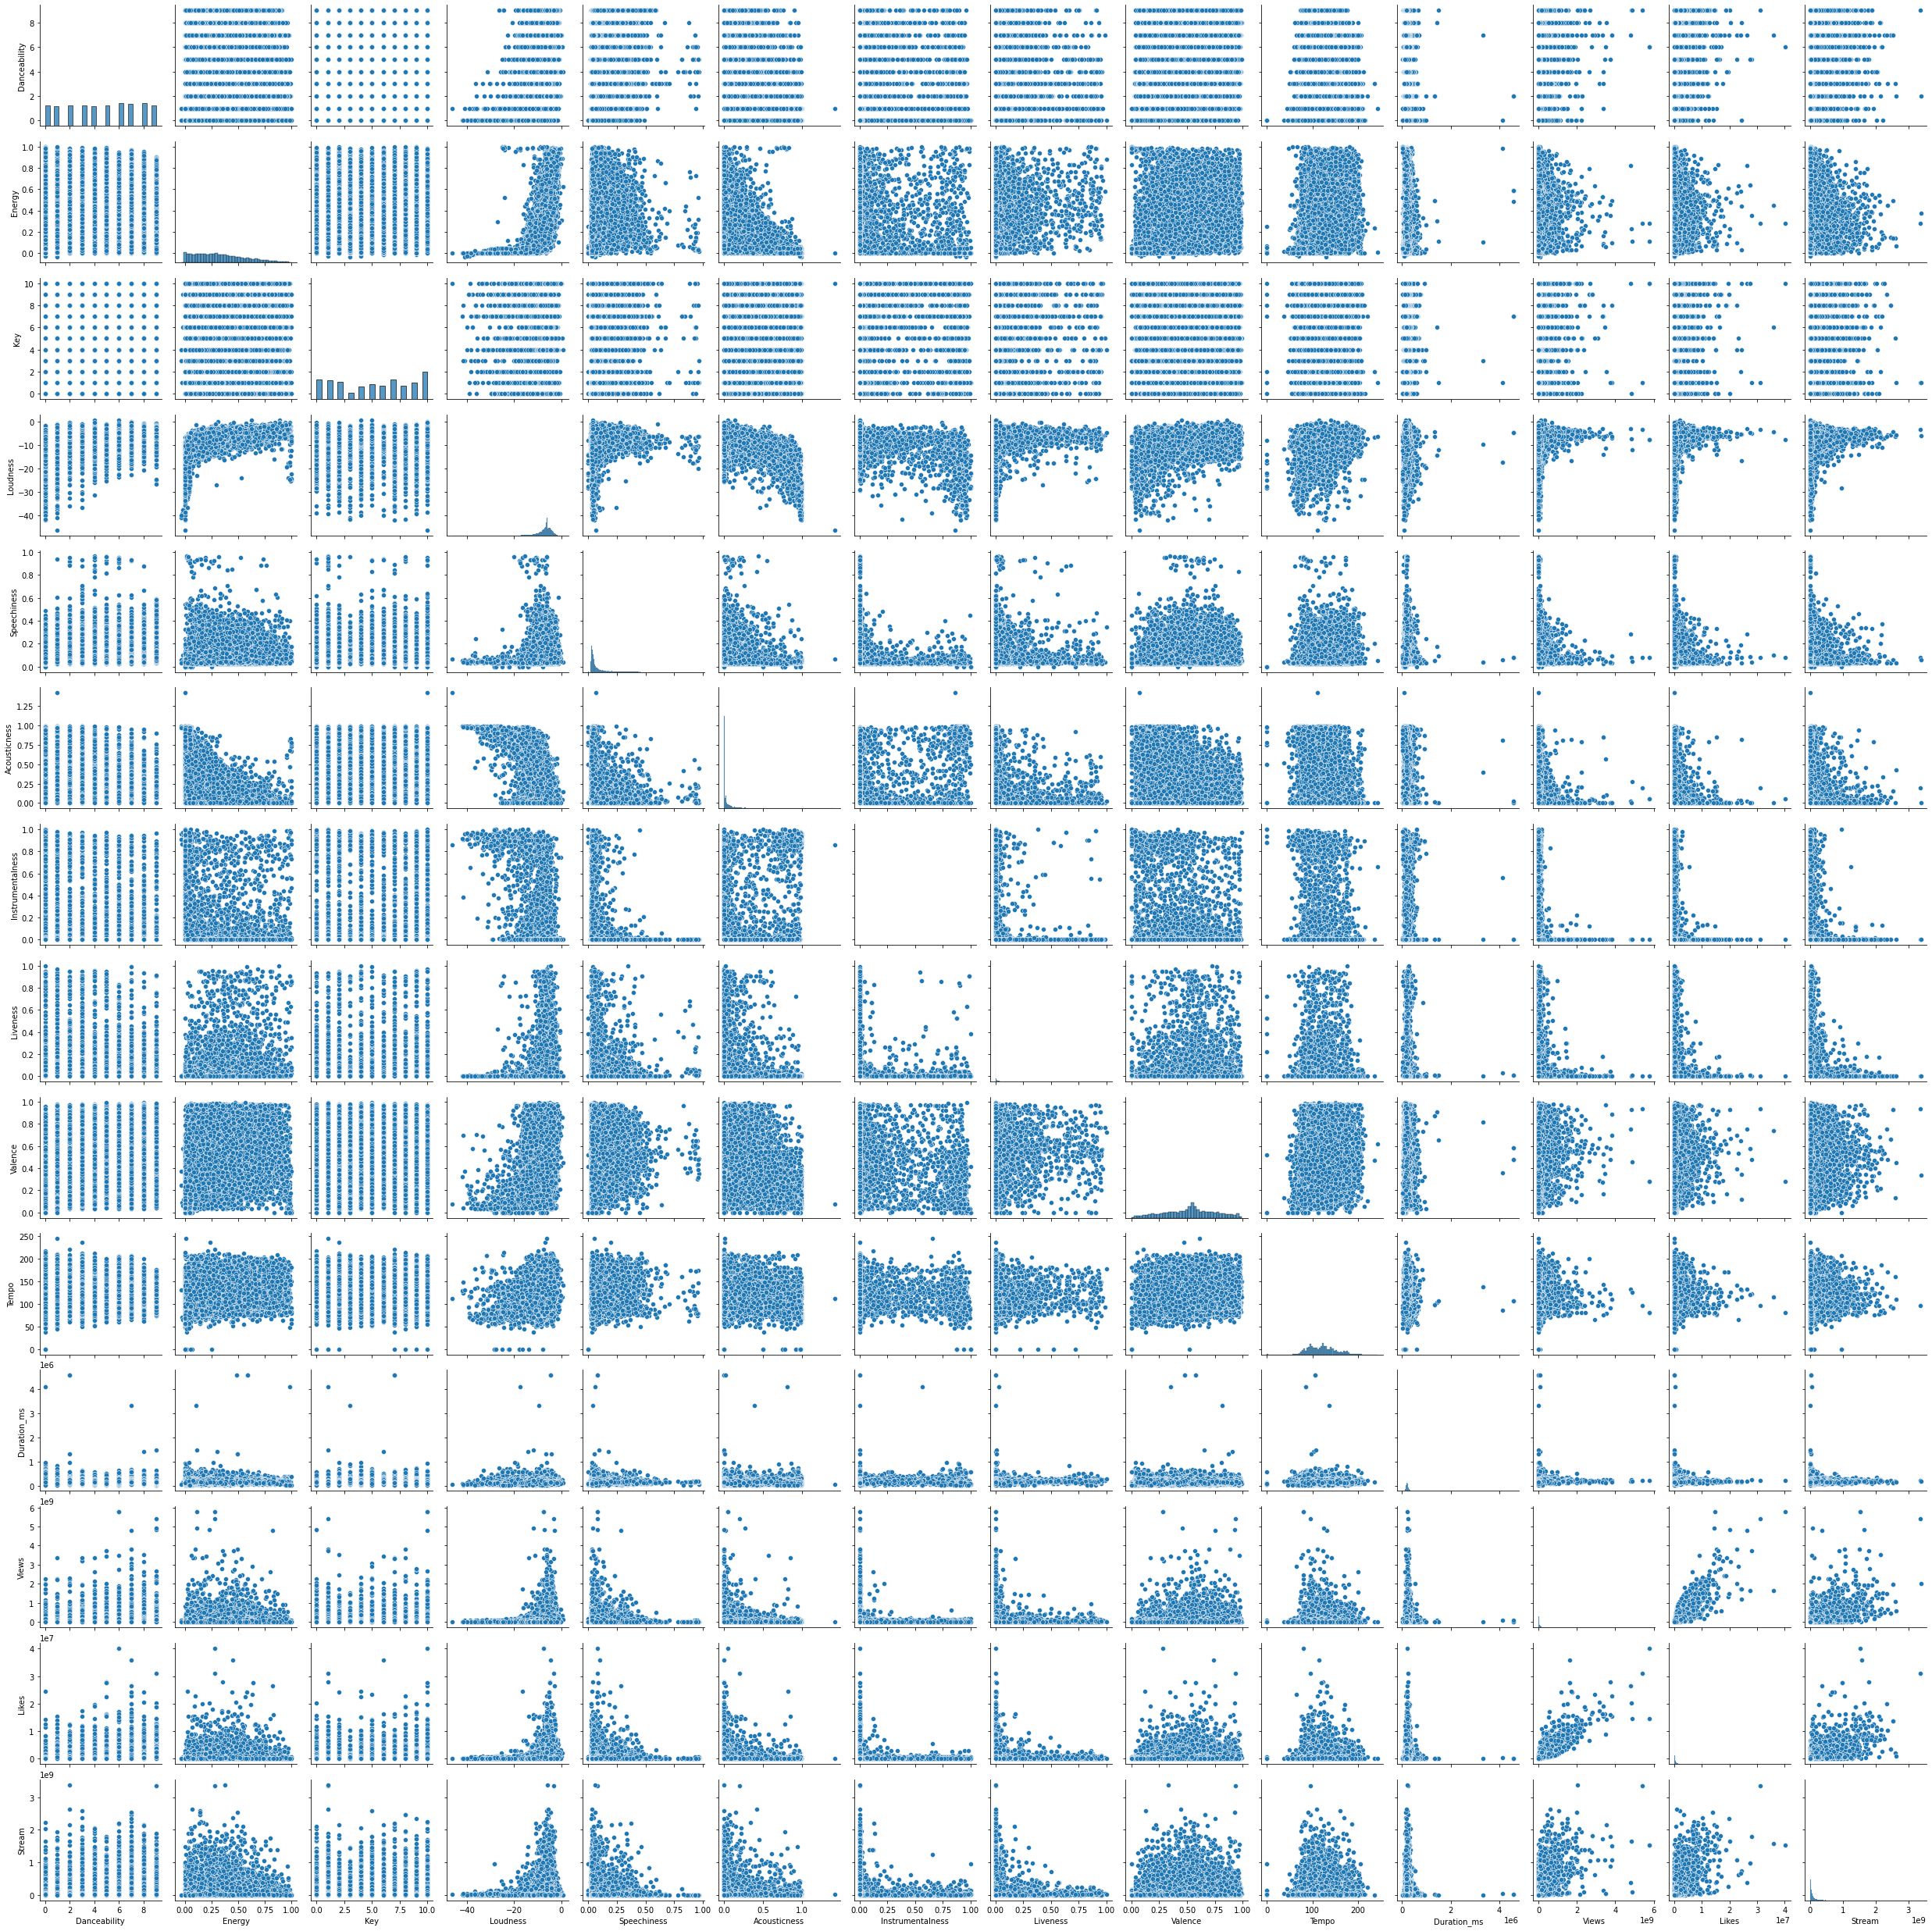

In [7]:
df_tr_pair=df_tr[['Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo',
       'Duration_ms', 'Views', 'Likes', 'Stream']]
sns.pairplot(df_tr_pair)
plt.show()